## Question 11: Consumption Growth
#### 0. Download the US annual real growth rate of per capita consumption (c)

In [4]:
import pandas as pd
import numpy as np

excel_file = ''
sheet_name = 'Data'
range_1 = 'A27:A147'
range_2 = 'I27:I147'

# Read the specific range from the Excel file
year = pd.read_excel("chapt26.xlsx", sheet_name="Data", usecols='A', skiprows=26,
nrows=120)
c = pd.read_excel("chapt26.xlsx", sheet_name="Data", usecols='I', skiprows=26,
nrows=120)
dta = pd.concat([year, c], axis=1)
dta.columns = ['year', 'c']
dta

,year,c
0,1890,2674.739801
1,1891,2802.827499
2,1892,2877.010456
3,1893,2834.846162
4,1894,2698.707529
...,...,...
115,2005,29790.295775
116,2006,30364.433438
117,2007,30867.609872
118,2008,30509.081237


#### 1. Compute the growth rate of c

In [8]:
dta['c_lag'] = dta['c'].shift(1)
dta['gc'] = dta['c']/dta['c_lag']
dta['gc'] = dta['gc'].apply(lambda x: np.log(x))
dta

,year,c,d,c_lag,gc
0,1890,2674.739801,0,NaN,NaN
1,1891,2802.827499,0,2674.739801,0.046777
2,1892,2877.010456,0,2802.827499,0.026123
3,1893,2834.846162,0,2877.010456,-0.014764
4,1894,2698.707529,0,2834.846162,-0.049215
...,...,...,...,...,...
115,2005,29790.295775,1,29087.295635,0.023881
116,2006,30364.433438,1,29790.295775,0.019089
117,2007,30867.609872,1,30364.433438,0.016435
118,2008,30509.081237,1,30867.609872,-0.011683


#### 2. Lag the consumption growth rate and drop the NA row. Review the output.

In [11]:
dta['gc_lag'] = dta['gc'].shift(1)
dta = dta.dropna()
dta

,year,c,d,c_lag,gc,gc_lag
2,1892,2877.010456,0,2802.827499,0.026123,0.046777
3,1893,2834.846162,0,2877.010456,-0.014764,0.026123
4,1894,2698.707529,0,2834.846162,-0.049215,-0.014764
5,1895,2979.457336,0,2698.707529,0.098968,-0.049215
6,1896,2916.275277,0,2979.457336,-0.021434,0.098968
...,...,...,...,...,...,...
115,2005,29790.295775,1,29087.295635,0.023881,0.025016
116,2006,30364.433438,1,29790.295775,0.019089,0.023881
117,2007,30867.609872,1,30364.433438,0.016435,0.019089
118,2008,30509.081237,1,30867.609872,-0.011683,0.016435


#### 3. Drop the c and c_lag. Review the output:

In [14]:
dta = dta.drop(columns=["c","c_lag"])
dta

,year,d,gc,gc_lag
2,1892,0,0.026123,0.046777
3,1893,0,-0.014764,0.026123
4,1894,0,-0.049215,-0.014764
5,1895,0,0.098968,-0.049215
6,1896,0,-0.021434,0.098968
...,...,...,...,...
115,2005,1,0.023881,0.025016
116,2006,1,0.019089,0.023881
117,2007,1,0.016435,0.019089
118,2008,1,-0.011683,0.016435


#### 4. Add a dummy variable (d) that takes the value of 0 if year ≤ 1930 and 1 otherwise. Add a column that is the product of gc_lag and d.

In [17]:
dta["d"] = np.where(dta['year'] <= 1930,0,1)
dta["gc_lag_d"] = dta["gc_lag"] * dta["d"]
dta

,year,d,gc,gc_lag,gc_lag_d
2,1892,0,0.026123,0.046777,0.000000
3,1893,0,-0.014764,0.026123,0.000000
4,1894,0,-0.049215,-0.014764,-0.000000
5,1895,0,0.098968,-0.049215,-0.000000
6,1896,0,-0.021434,0.098968,0.000000
...,...,...,...,...,...
115,2005,1,0.023881,0.025016,0.025016
116,2006,1,0.019089,0.023881,0.023881
117,2007,1,0.016435,0.019089,0.019089
118,2008,1,-0.011683,0.016435,0.016435


#### 5. Compute the count, mean and standard deviation of gc for the entire data

In [20]:
summ0 = dta.agg({"gc":["mean","std"]})
summ0

,gc
mean,0.020071
std,0.035177


#### 6. Compute the count, mean and standard deviation of gc for the pre- and post-1930 periods 

In [23]:
summ1 = dta.groupby(['d']).agg({"gc":["count","mean","std"]})
summ1 = summ1.reset_index()
summ1

d    gc                    
     count      mean       std
0  0    39  0.018139  0.046133
1  1    79  0.021025  0.028575

#### 7. Compute the correlation between gc and gc_lag for the entire dataset

In [26]:
corr = dta['gc'].corr(dta['gc_lag'])
corr

-0.056928033453734164

#### 8. Compute the correlation between gc and gc_lag for the pre- and post-1930 periods

In [29]:
corr_d0 = dta[dta['d'] == 0]['gc'].corr(dta[dta['d'] == 0]['gc_lag'])
corr_d1 = dta[dta['d'] == 1]['gc'].corr(dta[dta['d'] == 1]['gc_lag'])

print(f"Correlation when d = 0: {corr_d0}")
print(f"Correlation when d = 1: {corr_d1}")

Correlation when d = 0: -0.4136658731601553
Correlation when d = 1: 0.35918165263685153


#### 9. Plot gc over time

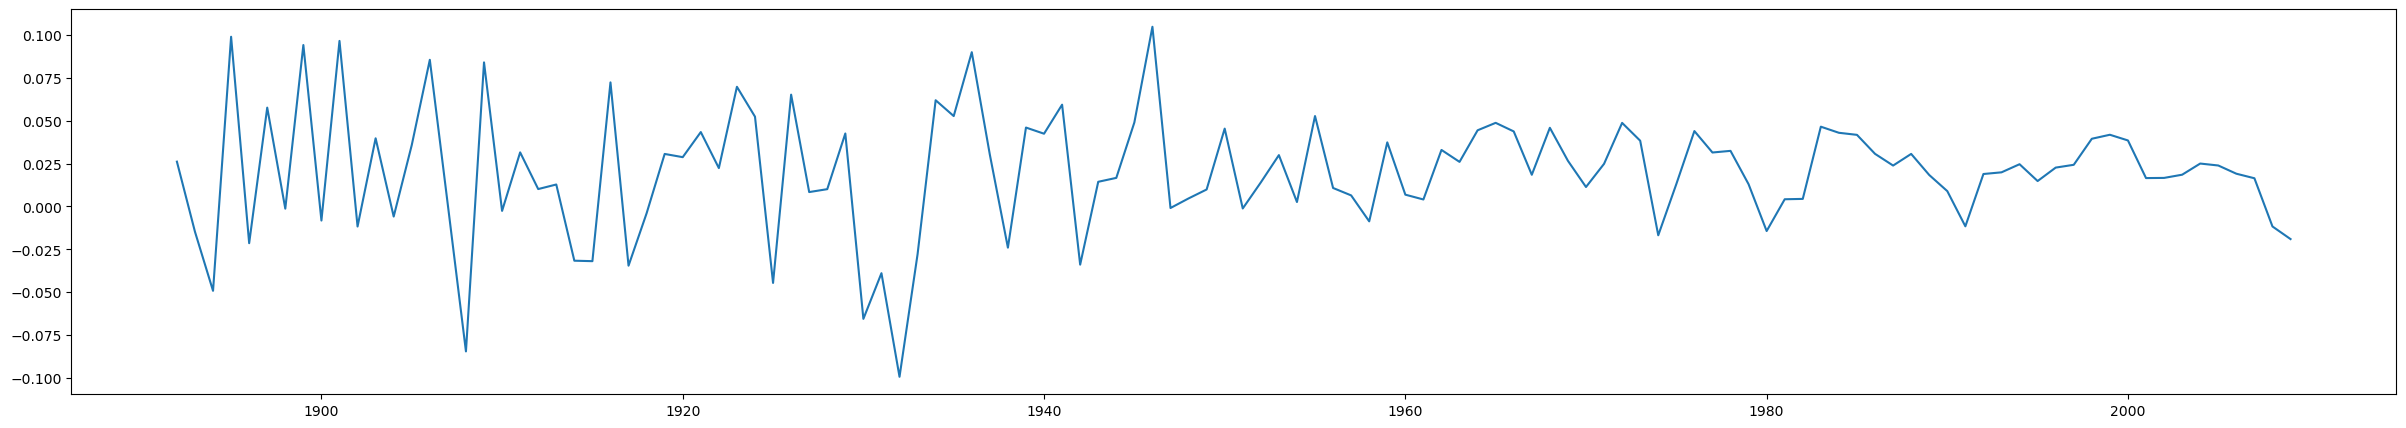

In [32]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(30,5))
plt.plot(dta['year'], dta['gc'])
plt.show()

#### 10. Scatter plot gc versus gc_lag for the entire period, for the pre-1930 and post-1930 periods.

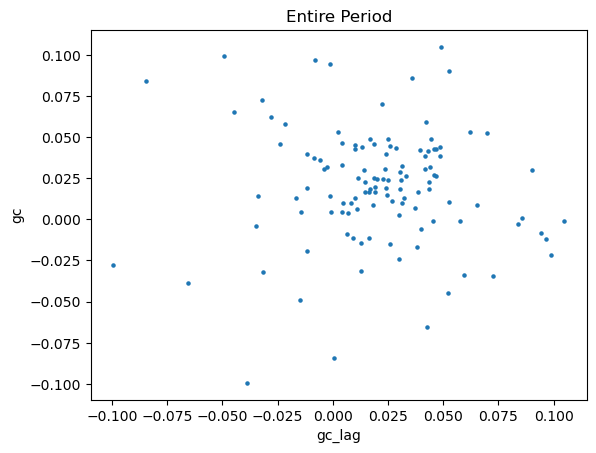

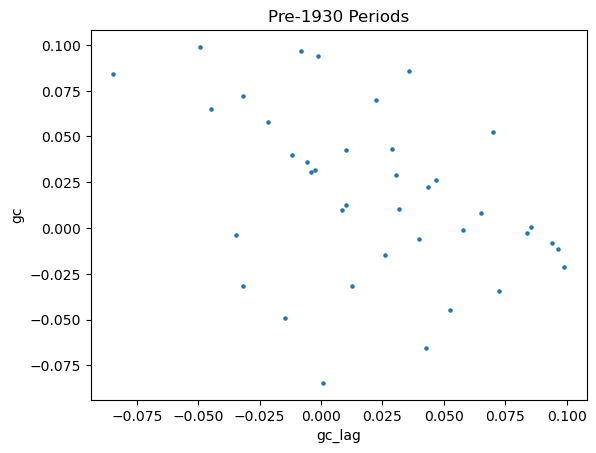

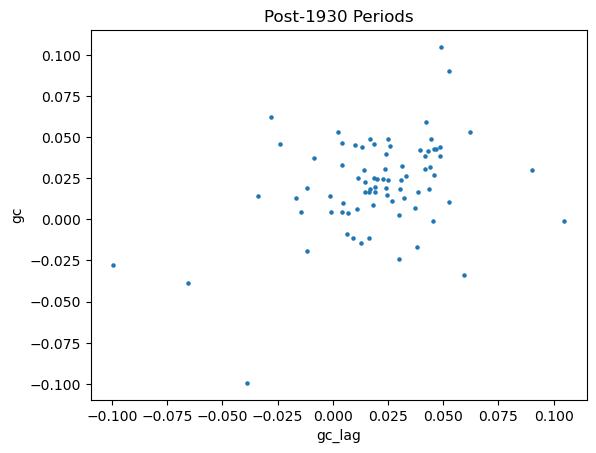

In [35]:
plt.scatter(dta['gc_lag'], dta['gc'],s = 5)
plt.title('Entire Period')
plt.xlabel('gc_lag')
plt.ylabel('gc')
plt.show()

dta_pre30 = dta[dta['d'] == 0]
dta_post30 = dta[dta['d'] == 1]

plt.scatter(dta_pre30['gc_lag'], dta_pre30['gc'], s = 5)
plt.title('Pre-1930 Periods')
plt.xlabel('gc_lag')
plt.ylabel('gc')
plt.show()

plt.scatter(dta_post30['gc_lag'], dta_post30['gc'], s = 5)
plt.title('Post-1930 Periods')
plt.xlabel('gc_lag')
plt.ylabel('gc')
plt.show()

#### 11. A, B, C

In [38]:
# A
np.average(dta_pre30['gc']), np.average(dta_post30['gc']) 

(0.01813871024208073, 0.021024704747652532)

In [40]:
# B
np.std(dta_pre30['gc']), np.std(dta_post30['gc'])

(0.04553742815201228, 0.02839341922089987)

#### 12. Run a linear regression of gc on its lag gc_lag. Review the output summary.


In [43]:
import statsmodels.api as sm

X = dta['gc_lag']
y = dta['gc']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     gc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.3772
Date:                Tue, 05 Nov 2024   Prob (F-statistic):              0.540
Time:                        10:23:27   Log-Likelihood:                 228.25
No. Observations:                 118   AIC:                            -452.5
Df Residuals:                     116   BIC:                            -447.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0212      0.004      5.635      0.0

#### 13. Run a linear regression of gc on its lag gc_lag, the dummy variable d, and the interaction dummy gc_lag_d.

In [46]:
X = dta[['gc_lag', 'd', 'gc_lag_d']]
y = dta['gc']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     gc   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     6.909
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           0.000258
Time:                        10:23:28   Log-Likelihood:                 237.91
No. Observations:                 118   AIC:                            -467.8
Df Residuals:                     114   BIC:                            -456.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0272      0.006      4.670      0.0

#### 14. A, B, C, D, E
Post-1930(d = 1): gc = 0.014 + 0.3437 * gc_lag

Pre-1930(d = 0): gc = 0.0272 - 0.4314 * gc_lag

A. True

B. True

C. True

D. True

E. True

#### 15.  Conduct a F test and compare the two models (restricted and unrestricted).

In [50]:
import statsmodels.api as sm
model_res = sm.OLS(dta['gc'], sm.add_constant(dta[['gc_lag']])).fit()
model_unr = sm.OLS(dta['gc'], sm.add_constant(dta[['gc_lag', 'd', 'gc_lag_d']])).fit()

In [52]:
print(model_res.summary())

                            OLS Regression Results                            
Dep. Variable:                     gc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.3772
Date:                Tue, 05 Nov 2024   Prob (F-statistic):              0.540
Time:                        10:23:33   Log-Likelihood:                 228.25
No. Observations:                 118   AIC:                            -452.5
Df Residuals:                     116   BIC:                            -447.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0212      0.004      5.635      0.0

In [54]:
print(model_unr.summary())

                            OLS Regression Results                            
Dep. Variable:                     gc   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     6.909
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           0.000258
Time:                        10:23:33   Log-Likelihood:                 237.91
No. Observations:                 118   AIC:                            -467.8
Df Residuals:                     114   BIC:                            -456.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0272      0.006      4.670      0.0

In [56]:
anova_results = sm.stats.anova_lm(model_res, model_unr, type = 1)
print(anova_results)

   df_resid       ssr  df_diff   ss_diff          F    Pr(>F)
0     116.0  0.144310      0.0       NaN        NaN       NaN
1     114.0  0.122506      2.0  0.021804  10.144919  0.000088


#### 16. C, D, E
A. False

B. False

C. True

D. True. Under the null hypothesis, an F-statistic as extreme as 10.144919 (or larger) would only occur 0.0088% of the time.

E. True. The p-value (0.000088) is below 0.01 (1%). Since the p-value is much smaller than the 1% significance level, we can reject the null hypothesis.

#### 17. From a economic policy perspective, why is this finding relevant?

This finding is relevant because it allows us to determine if the addition of the dummy variable (d) and the interaction term improves the model and provides meaningful additional insights. From an economic policy perspective, the F-statistic helps answer the question:

"Does the relationship between current growth rates of per capita consumption and lagged growth rates change after 1930?"

From an economic policy perspective, this provides evidence of structural changes in the relationship between past and current economic growth. If the F-statistic is significant, it suggests that policies enacted after 1930 (perhaps in response to the Great Depression) may have significantly altered the dynamics of consumption growth, and that different policy approaches might be required for different time periods.

If the interaction term is not significant, it would suggest that economic growth dynamics remained relatively stable before and after 1930, and therefore, policy responses might not need to differentiate between these periods.

#### 18. D, E
A. False

B. False. -0.43.

C. False. 0.34

D. True

E. True. P value (0.075) is bigger than 5%.

#### 19. Compute the F-statistic between the restricted and unrestricted models with the year cutoff for the dummy in the range 1920−1990. Plot the F-statistics by cutoff year. Which year is the F-statistics the highest?

In [69]:
f_list = []

for cut in range(1920,1991):
    y = dta["gc"]
    dta["d"] = np.where(dta['year'] <= cut,0,1)
    dta["gc_lag_d"] = dta["gc_lag"]*dta["d"]
    x = dta[["gc_lag"]]
    x = sm.add_constant(x)
    model_res = sm.OLS(y,x).fit()
    x = dta[["gc_lag","d","gc_lag_d"]]
    x = sm.add_constant(x)
    model_unr = sm.OLS(y,x).fit()
    anova_results = sm.stats.anova_lm(model_res, model_unr, typ=1)
    f_list.append(anova_results.F[1])

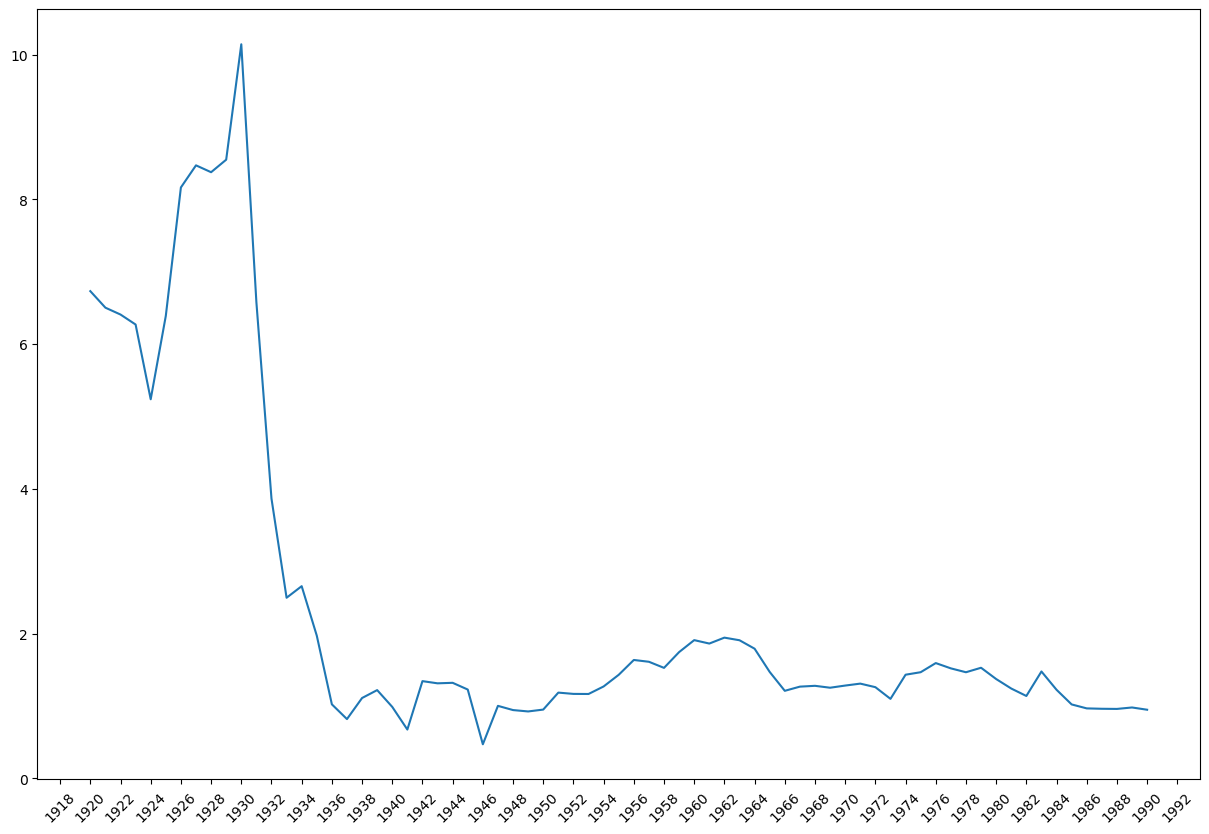

In [71]:
import matplotlib.ticker as ticker

plt.figure(figsize=(15,10))
plt.plot(range(1920,1991),f_list)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(50))
plt.show()

1930 has the highest F-statistics.